In [16]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from pmdarima.arima import auto_arima
from scipy import stats
from sklearn.model_selection import train_test_split
import bsts
from sklearn.metrics import mean_squared_error
import math

In [17]:
data = []

df = pd.read_excel('C:/Users/katya/OneDrive/Рабочий стол/_/НГТУ/8 семестр/КМ/новые_данные.xlsx',index_col=None, header=None)
for i in range (0,len(df)):
    data.append(round(df.values[i][0],2))

data_ = pd.Series(data) # Временной ряд

In [18]:
# Предсказание 10 значений
model = bsts.BSTS(seasonality=45)
model.fit(data_.values, num_warmup=110, num_samples=110)

n_pred = 10 # количество предсказываемых значений
# Предсказание
forecast = model.predict(n_pred)
preds = forecast.mean(axis=0)

sample: 100%|███████████████████████████| 220/220 [00:10<00:00, 21.06it/s, 1023 steps of size 5.46e-04. acc. prob=0.71]


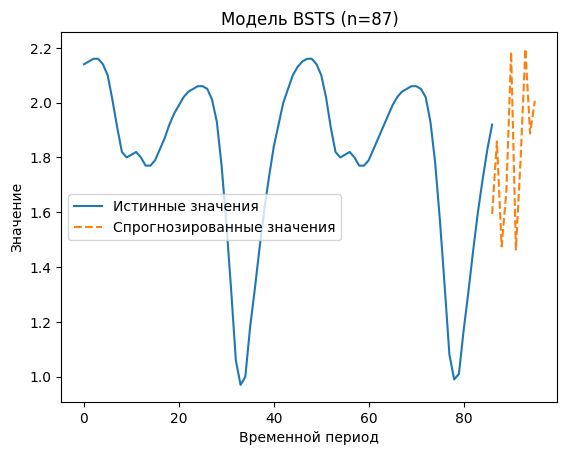

In [19]:
plt.plot(data_, label='Истинные значения')
plt.plot(range(len(data_)-1, len(data_)-1+n_pred), preds, "--", label='Спрогнозированные значения')
plt.xlabel('Временной период')
plt.ylabel('Значение')
plt.title('Модель BSTS (n={})'.format(len(data_)))
plt.legend()
plt.gcf().set_facecolor('white')
plt.show()

In [20]:
# Модель не показала корректных результатов при различной параметризации модели